In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import r2_score


In [229]:
df = pd.read_csv("D:\8thSemester\Machine Learning\project\Dataset\Solar Radiation\Final\winner.csv")


In [67]:
X = df.iloc[:,2:6].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
residual = y_test - y_pred

model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)

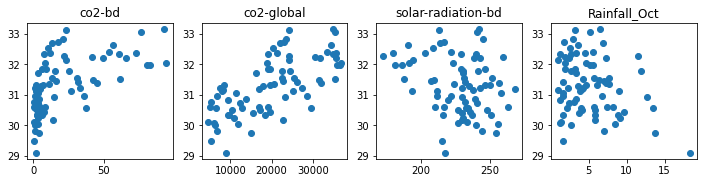

In [17]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(12, 2.5))

ax1.scatter(df['co2-bd'], df['Temperature'])
ax1.set_title("co2-bd")

ax2.scatter(df['co2-global'], df['Temperature'])
ax2.set_title("co2-global")
              
ax3.scatter(df['Radiation'], df['Temperature'])
ax3.set_title("solar-radiation-bd")

ax4.scatter(df['Rainfall_Oct'], df['Temperature'])
ax4.set_title("Rainfall_Oct")
plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [19]:
pd.DataFrame({'vif': vif}, index=df.columns[2:6]).T

,co2-bd,co2-global,Radiation,Rainfall_Oct
vif,8.477154,21.87815,8.84422,3.003091


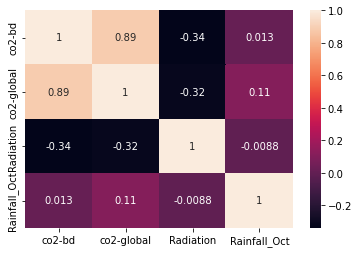

In [21]:
sns.heatmap(df.iloc[:,2:6].corr(),annot=True)

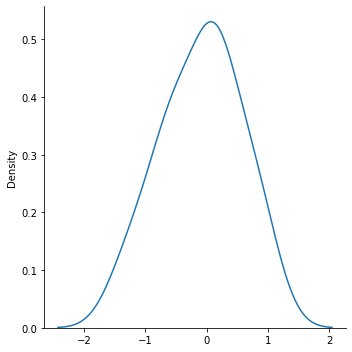

In [48]:
sns.displot(residual,kind='kde')

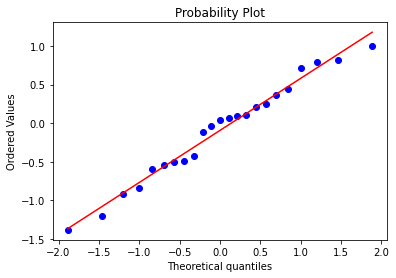

In [55]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

C:\Users\Mehedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mehedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


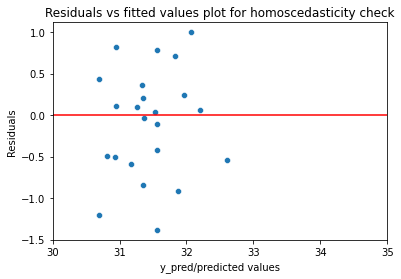

In [177]:
p = sns.scatterplot(y_pred,residual)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
#plt.ylim(-10,10)
plt.xlim(30,35)
p = sns.lineplot([0,35],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

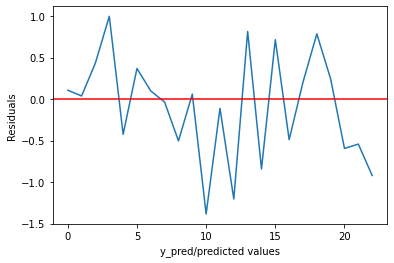

In [182]:
plt.plot(residual)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.axhline(y = 0.0, color = 'r', linestyle = '-')

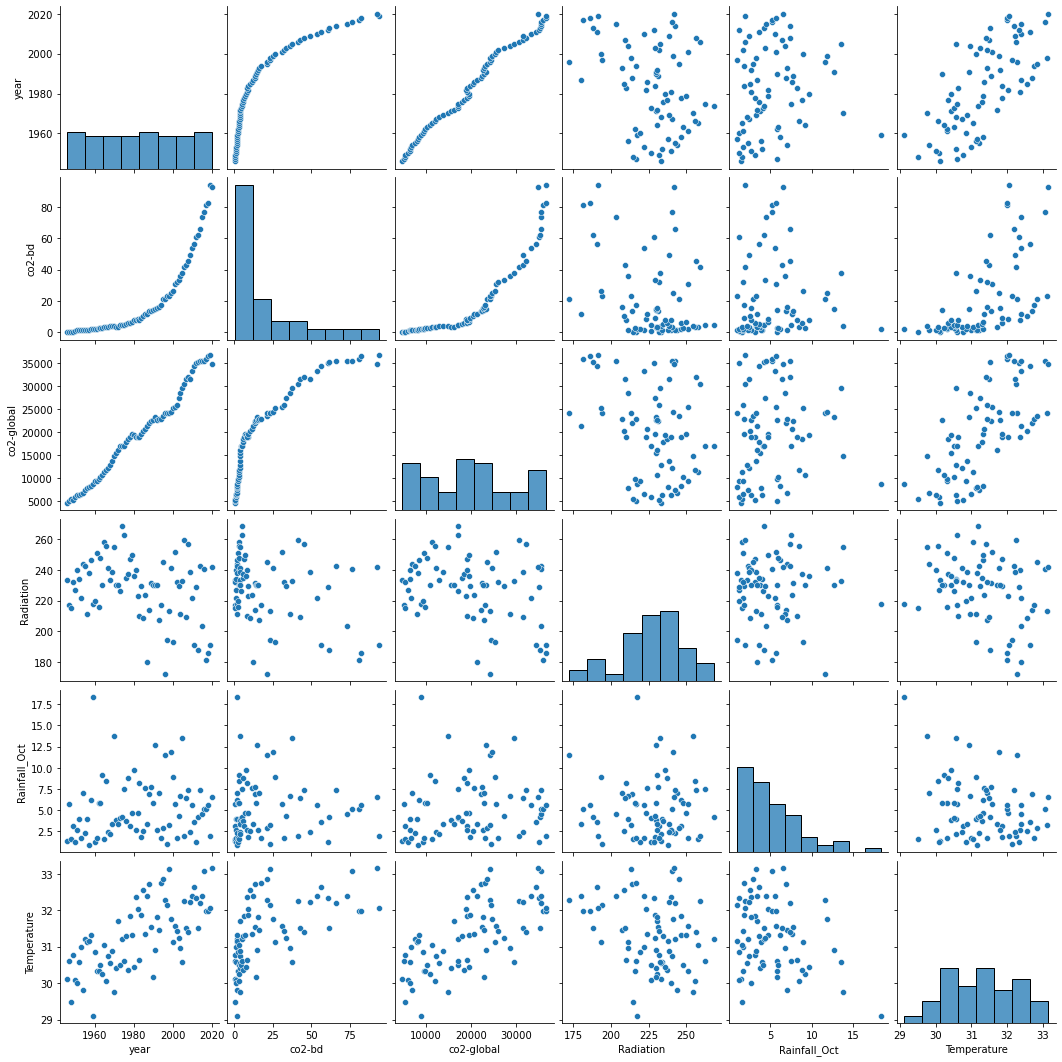

In [84]:
import seaborn as sns
sns.pairplot(df)

In [86]:
df_scaled = df.copy()
col_names = ['co2-bd', 'co2-global','Radiation','Rainfall_Oct']
features = df_scaled[col_names]

In [133]:
import pandas
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     27.33
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.12e-13
Time:                        10:28:25   Log-Likelihood:                -65.624
No. Observations:                  75   AIC:                             141.2
Df Residuals:                      70   BIC:                             152.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.8766      0.870     35.476      0.0

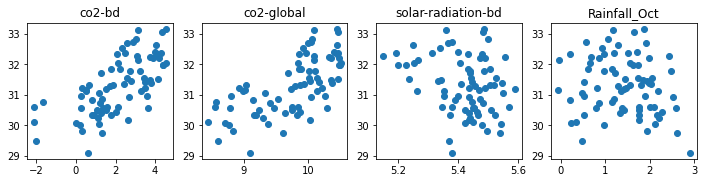

In [187]:
#log transformation
df_t = np.log(df.iloc[:,2:6].values)
x_t = df_t[:, 0:4]

l1 = df_t[:, 0]
l2 = df_t[:, 1]
l3 = df_t[:, 2]
l4 = df_t[:, 3]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(12, 2.5))

ax1.scatter(l1, df['Temperature'])
ax1.set_title("co2-bd")

ax2.scatter(l2, df['Temperature'])
ax2.set_title("co2-global")
              
ax3.scatter(l3, df['Temperature'])
ax3.set_title("solar-radiation-bd")

ax4.scatter(l4, df['Temperature'])
ax4.set_title("Rainfall_Oct")
plt.show()

In [156]:
import pandas
import statsmodels.api as sm

df_t = np.sqrt(df.iloc[:,2:6].values)
x_t = df_t[:, 0:4]

X = sm.add_constant(x_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     27.00
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.45e-13
Time:                        10:58:58   Log-Likelihood:                -65.908
No. Observations:                  75   AIC:                             141.8
Df Residuals:                      70   BIC:                             153.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.8890      1.684     18.348      0.0

In [157]:
import pandas
import statsmodels.api as sm

df_t = np.cbrt(df.iloc[:,2:6].values)
x_t = df_t[:, 0:4]

X = sm.add_constant(x_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     26.60
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.98e-13
Time:                        10:59:57   Log-Likelihood:                -66.243
No. Observations:                  75   AIC:                             142.5
Df Residuals:                      70   BIC:                             154.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.0283      2.509     12.367      0.0

In [167]:
import pandas
import statsmodels.api as sm

df_t = np.log(df.iloc[:,2:6].values)
x_t = df_t[:, 0:4]

X = sm.add_constant(x_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     26.60
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.98e-13
Time:                        11:19:57   Log-Likelihood:                -66.243
No. Observations:                  75   AIC:                             142.5
Df Residuals:                      70   BIC:                             154.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.0283      2.509     12.367      0.0

In [208]:
df.head()

,country,year,co2_bd,co2_world,Radiation,Rainfall_Oct,co2_product,Temperature
0,Bangladesh,1946,0.117,4633.477,233.32,1.41144,542.116809,30.11
1,Bangladesh,1947,0.121,5130.186,217.01,5.77714,620.752506,30.61
2,Bangladesh,1948,0.134,5401.115,214.89,1.62988,723.749410,29.49
3,Bangladesh,1949,0.190,5243.103,232.08,3.14604,996.189570,30.76
4,Bangladesh,1950,0.993,6003.238,226.68,1.26439,5961.215334,30.09


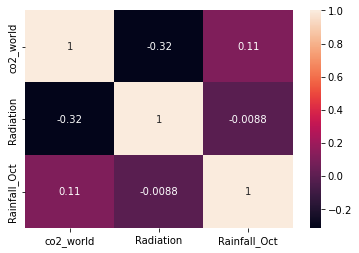

In [213]:
sns.heatmap(df.iloc[:,3:6].corr(),annot=True)

In [214]:
#linear regression
X = df.iloc[:,2:6].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
residual = y_test - y_pred

model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)

0.6096606185655843


In [ ]:
# co2_bd * co2_global
df['co2_product'] = df.apply(lambda row: (row.co2_world*row.co2_bd), axis=1)
df[['Temperature','co2_product']]=df[['co2_product','Temperature']]
df = df.rename({'Temperature': 'co2_product', 'co2_product': 'Temperature'}, axis=1)  # new method
#df.drop(['co2-ratio'], axis=1, inplace=True)

In [188]:
import pandas
import statsmodels.api as sm
X = sm.add_constant(x_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     24.98
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           7.14e-13
Time:                        15:30:07   Log-Likelihood:                -67.645
No. Observations:                  75   AIC:                             145.3
Df Residuals:                      70   BIC:                             156.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1054      6.216      4.521      0.0

In [230]:
#log transformation on CO2_world
df['co2_log'] = df.apply(lambda row: np.log(row.co2_world), axis=1)
df[['Temperature','co2_log']]=df[['co2_log','Temperature']]
df = df.rename({'Temperature': 'co2_log', 'co2_log': 'Temperature'}, axis=1)  # new method
#df.drop(['co2-ratio'], axis=1, inplace=True)

In [231]:
df.head()

,country,year,co2_bd,co2_world,Radiation,Rainfall_Oct,co2_log,Temperature
0,Bangladesh,1946,0.117,4633.477,233.32,1.41144,8.441063,30.11
1,Bangladesh,1947,0.121,5130.186,217.01,5.77714,8.542897,30.61
2,Bangladesh,1948,0.134,5401.115,214.89,1.62988,8.594361,29.49
3,Bangladesh,1949,0.190,5243.103,232.08,3.14604,8.564669,30.76
4,Bangladesh,1950,0.993,6003.238,226.68,1.26439,8.700054,30.09


In [232]:
#after log transformation

import pandas
import statsmodels.api as sm

#df_t = np.log(df.iloc[:,2:6].values)
df_t = df[['Radiation','Rainfall_Oct','co2_log']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     38.44
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           7.21e-15
Time:                        18:18:56   Log-Likelihood:                -64.725
No. Observations:                  75   AIC:                             137.5
Df Residuals:                      71   BIC:                             146.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           21.5751      1.574     13.704   

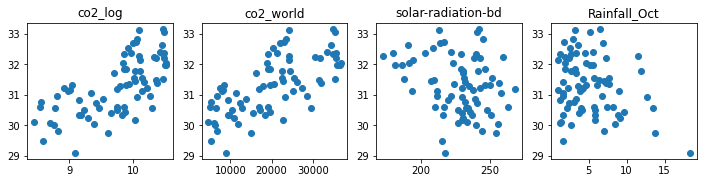

In [233]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(12, 2.5))

ax1.scatter(df['co2_log'], df['Temperature'])
ax1.set_title("co2_log")

ax2.scatter(df['co2_world'], df['Temperature'])
ax2.set_title("co2_world")
              
ax3.scatter(df['Radiation'], df['Temperature'])
ax3.set_title("solar-radiation-bd")

ax4.scatter(df['Rainfall_Oct'], df['Temperature'])
ax4.set_title("Rainfall_Oct")
plt.show()

In [237]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['Radiation_log'] = df.apply(lambda row: np.log(row.Radiation), axis=1)
df_t = df[['Radiation_log','Rainfall_Oct','co2_world']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     35.35
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           4.34e-14
Time:                        18:22:25   Log-Likelihood:                -66.637
No. Observations:                  75   AIC:                             141.3
Df Residuals:                      71   BIC:                             150.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            33.0528      4.304      7.680

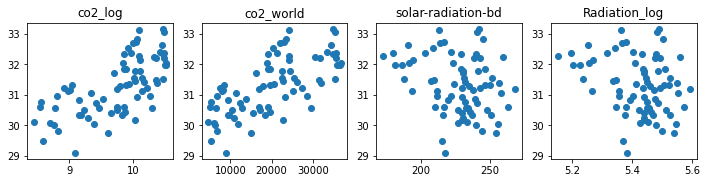

In [238]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(12, 2.5))

ax1.scatter(df['co2_log'], df['Temperature'])
ax1.set_title("co2_log")

ax2.scatter(df['co2_world'], df['Temperature'])
ax2.set_title("co2_world")
              
ax3.scatter(df['Radiation'], df['Temperature'])
ax3.set_title("solar-radiation-bd")

ax4.scatter(df['Radiation_log'], df['Temperature'])
ax4.set_title("Radiation_log")
plt.show()

In [239]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['Rainfall_Oct_log'] = df.apply(lambda row: np.log(row.Rainfall_Oct), axis=1)
df_t = df[['Radiation','Rainfall_Oct_log','co2_world']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     30.89
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           6.87e-13
Time:                        18:30:16   Log-Likelihood:                -69.583
No. Observations:                  75   AIC:                             147.2
Df Residuals:                      71   BIC:                             156.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               30.8970      0.911  

In [240]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['Rainfall_Oct_exp'] = df.apply(lambda row: np.exp(row.Rainfall_Oct), axis=1)
df_t = df[['Radiation','Rainfall_Oct_exp','co2_world']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     24.88
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           4.12e-11
Time:                        18:33:10   Log-Likelihood:                -73.957
No. Observations:                  75   AIC:                             155.9
Df Residuals:                      71   BIC:                             165.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               30.9060      0.971  

In [241]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['Rainfall_Oct_sqrt'] = df.apply(lambda row: np.sqrt(row.Rainfall_Oct), axis=1)
df_t = df[['Radiation','Rainfall_Oct_sqrt','co2_world']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     33.61
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.24e-13
Time:                        18:34:34   Log-Likelihood:                -67.756
No. Observations:                  75   AIC:                             143.5
Df Residuals:                      71   BIC:                             152.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                31.2875      0.90

In [242]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['Rainfall_Oct_cbrt'] = df.apply(lambda row: np.cbrt(row.Rainfall_Oct), axis=1)
df_t = df[['Radiation','Rainfall_Oct_cbrt','co2_world']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     32.78
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           2.08e-13
Time:                        18:35:30   Log-Likelihood:                -68.308
No. Observations:                  75   AIC:                             144.6
Df Residuals:                      71   BIC:                             153.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                31.6954      0.92

In [243]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['Rainfall_test'] = df.apply(lambda row: (1/row.Rainfall_Oct), axis=1)
df_t = df[['Radiation','Rainfall_test','co2_world']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     25.82
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           2.11e-11
Time:                        18:37:35   Log-Likelihood:                -73.241
No. Observations:                  75   AIC:                             154.5
Df Residuals:                      71   BIC:                             163.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            30.0355      0.977     30.732

In [244]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['Rainfall_test'] = df.apply(lambda row: (1/np.square(row.Rainfall_Oct)), axis=1)
df_t = df[['Radiation','Rainfall_test','co2_world']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     23.40
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.22e-10
Time:                        18:39:15   Log-Likelihood:                -75.118
No. Observations:                  75   AIC:                             158.2
Df Residuals:                      71   BIC:                             167.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            30.2835      0.994     30.468

In [245]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['Rainfall_test'] = df.apply(lambda row: (1/np.sqrt(row.Rainfall_Oct)), axis=1)
df_t = df[['Radiation','Rainfall_test','co2_world']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     28.06
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           4.44e-12
Time:                        18:39:48   Log-Likelihood:                -71.577
No. Observations:                  75   AIC:                             151.2
Df Residuals:                      71   BIC:                             160.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.5997      0.983     30.127

In [246]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['Rainfall_test'] = df.apply(lambda row: (1/np.cbrt(row.Rainfall_Oct)), axis=1)
df_t = df[['Radiation','Rainfall_test','co2_world']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     28.96
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           2.43e-12
Time:                        18:40:49   Log-Likelihood:                -70.930
No. Observations:                  75   AIC:                             149.9
Df Residuals:                      71   BIC:                             159.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.1785      1.012     28.825

In [249]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['Rainfall_test'] = df.apply(lambda row: (1/np.power(row.Rainfall_Oct,4)), axis=1)
df_t = df[['Radiation','Rainfall_test','co2_world']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     22.33
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           2.74e-10
Time:                        18:42:53   Log-Likelihood:                -75.986
No. Observations:                  75   AIC:                             160.0
Df Residuals:                      71   BIC:                             169.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            30.4061      1.002     30.341

In [250]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['Rainfall_test'] = df.apply(lambda row: np.power(row.Rainfall_Oct,2), axis=1)
df_t = df[['Radiation','Rainfall_test','co2_world']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     34.81
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           5.99e-14
Time:                        18:44:09   Log-Likelihood:                -66.980
No. Observations:                  75   AIC:                             142.0
Df Residuals:                      71   BIC:                             151.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            30.8303      0.878     35.099

In [260]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['Rainfall_log'] = df.apply(lambda row: np.log(row.Rainfall_Oct), axis=1)
df_t = df[['Radiation','Rainfall_log','co2_log']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     33.23
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.57e-13
Time:                        19:03:48   Log-Likelihood:                -68.008
No. Observations:                  75   AIC:                             144.0
Df Residuals:                      71   BIC:                             153.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           21.2610      1.654     12.857   

In [259]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['co2_log10'] = df.apply(lambda row: np.log10(row.co2_world), axis=1)
df_t = df[['Radiation','Rainfall_Oct','co2_log10']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     38.44
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           7.21e-15
Time:                        18:51:15   Log-Likelihood:                -64.725
No. Observations:                  75   AIC:                             137.5
Df Residuals:                      71   BIC:                             146.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           21.5751      1.574     13.704   

In [264]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['Radiation_test'] = df.apply(lambda row: np.sqrt(row.Radiation), axis=1)
df_t = df[['Radiation_test','Rainfall_Oct','co2_world']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     35.34
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           4.37e-14
Time:                        19:07:41   Log-Likelihood:                -66.646
No. Observations:                  75   AIC:                             141.3
Df Residuals:                      71   BIC:                             150.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             31.3980      1.652     19.

In [265]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['Radiation_test'] = df.apply(lambda row: np.cbrt(row.Radiation), axis=1)
df_t = df[['Radiation_test','Rainfall_Oct','co2_world']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     35.34
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           4.36e-14
Time:                        19:07:51   Log-Likelihood:                -66.643
No. Observations:                  75   AIC:                             141.3
Df Residuals:                      71   BIC:                             150.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             31.8801      2.434     13.

In [271]:
#log transformation on Radiation
import pandas
import statsmodels.api as sm

df['Radiation_test'] = df.apply(lambda row:np.power(row.Radiation,2), axis=1)
df_t = df[['Radiation_test','Rainfall_Oct','co2_world']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     35.30
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           4.46e-14
Time:                        19:12:46   Log-Likelihood:                -66.666
No. Observations:                  75   AIC:                             141.3
Df Residuals:                      71   BIC:                             150.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             30.6726      0.496     61.